In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [16]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                "marital_status", "occupation", "relationship", "race", "sex", 
                "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
data = pd.read_csv(data_url, names=column_names, sep=',\s', na_values="?", engine='python')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [89]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


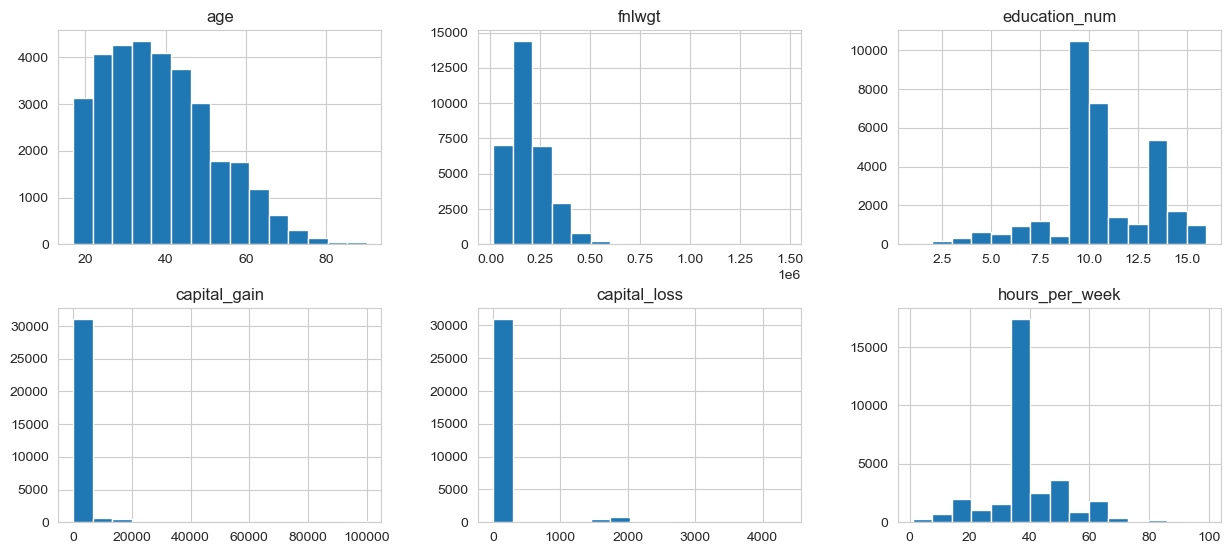

In [90]:
data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.show()

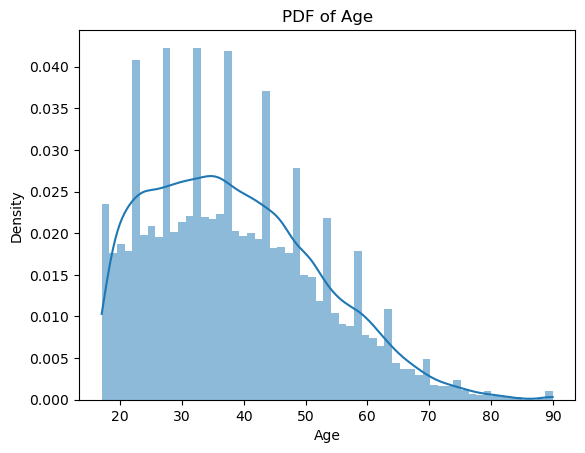

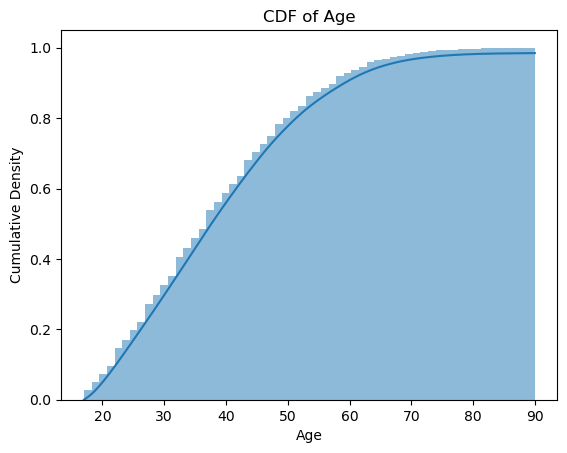

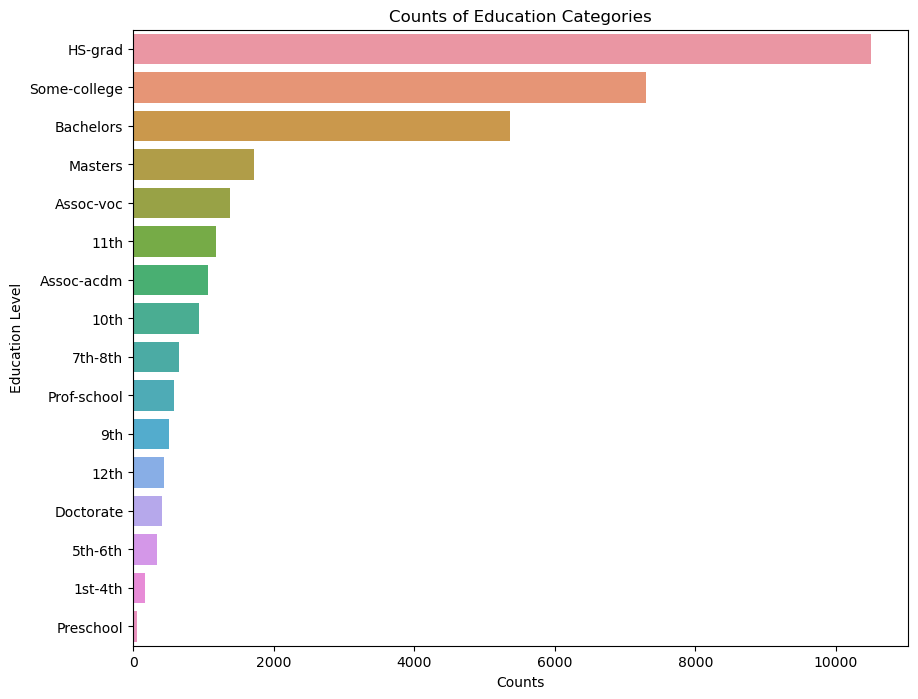

In [4]:
sns.histplot(data['age'], kde=True, stat='density', linewidth=0)
plt.title('PDF of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# CDF of age
sns.histplot(data['age'], kde=True, cumulative=True, stat='density', linewidth=0)
plt.title('CDF of Age')
plt.xlabel('Age')
plt.ylabel('Cumulative Density')
plt.show()

# Bar plot of education categories
plt.figure(figsize=(10, 8))
sns.countplot(y='education', data=data, order = data['education'].value_counts().index)
plt.title('Counts of Education Categories')
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.show()


In [20]:
data['income'].replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)

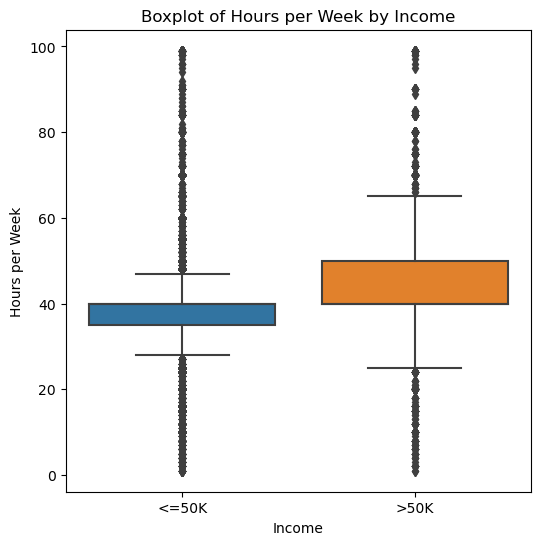

In [23]:
# Hours per week vs. Income
plt.figure(figsize=(6, 6))
sns.boxplot(x='income', y='hours_per_week', data=data)
plt.title('Boxplot of Hours per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()


In [91]:
print(data['workclass'].isna().sum())
print(data['occupation'].isna().sum())
print(data['native_country'].isna().sum())

1836
1843
583


In [54]:
#percentage
data.shape
(1843/32561)*100

5.660145572924664

In [92]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())


Column: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Column: education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Column: marital_status
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty   

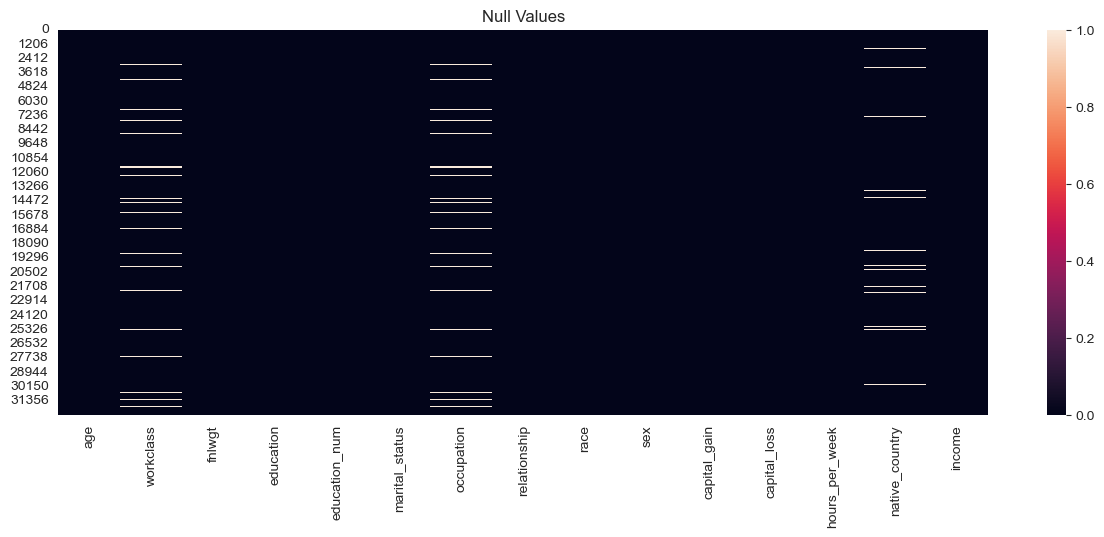

In [129]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isna())
plt.title('Null Values')
plt.show()

Missing values

In [93]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [131]:
for column in ['workclass', 'occupation', 'native_country']:
    mode = data[column].mode()[0]
    data[column].fillna(mode, inplace=True)

In [132]:
data[['workclass', 'occupation', 'native_country']].isna().sum()

workclass         0
occupation        0
native_country    0
dtype: int64

Outlier Treatment

In [133]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for column in ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']:
    data_cleaned = treat_outliers_iqr(data, column)


In [134]:
data_cleaned.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.0,32561.0,32561.000000
mean,38.555603,186829.079236,10.124321,0.0,0.0,41.202451
std,13.556130,95129.625135,2.459770,0.0,0.0,6.187005
min,17.000000,12285.000000,4.500000,0.0,0.0,32.500000
25%,28.000000,117827.000000,9.000000,0.0,0.0,40.000000
50%,37.000000,178356.000000,10.000000,0.0,0.0,40.000000
75%,48.000000,237051.000000,12.000000,0.0,0.0,45.000000
max,78.000000,415887.000000,16.000000,0.0,0.0,52.500000


In [137]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [141]:
data.drop(['capital_gain', 'capital_loss'], axis=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


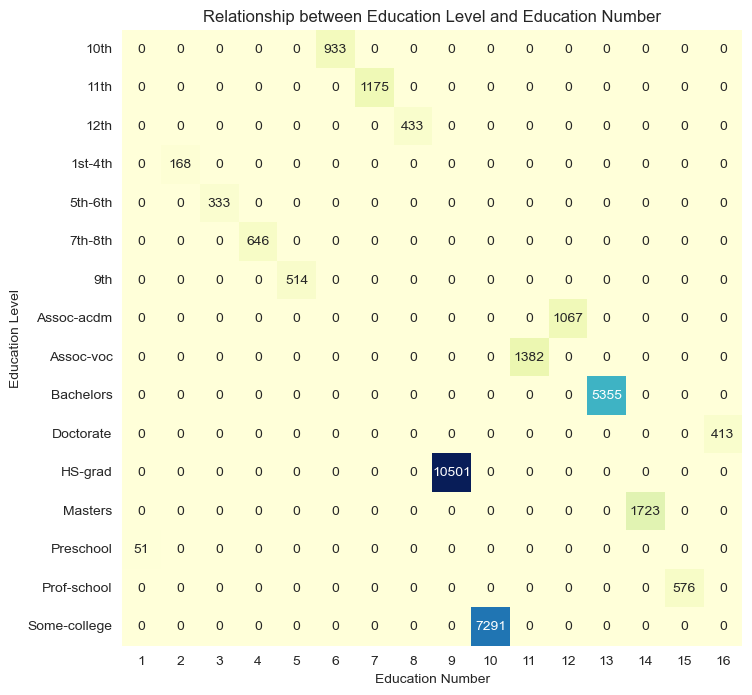

In [140]:
education_crosstab = pd.crosstab(index=data['education'], columns=data['education_num'])
plt.figure(figsize=(8, 8))
sns.heatmap(education_crosstab, annot=True, cmap="YlGnBu", cbar=False, fmt='g')
plt.xlabel('Education Number')
plt.ylabel('Education Level')
plt.title('Relationship between Education Level and Education Number')
plt.show()

In [142]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [143]:
data['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [144]:
data.drop(['education_num'], axis=1)

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Continous variable and output variable relation

In [104]:
numerical_features = ['age', 'fnlwgt', 'education_num', 'hours_per_week']
output_variable = 'income' 

# Dictionary to hold ANOVA results
anova_results = {}

for feature in numerical_features:
    group1 = data[data[output_variable] == '<=50K'][feature]
    group2 = data[data[output_variable] == '>50K'][feature]

    f_stat, p_value = f_oneway(group1, group2)
    anova_results[feature] = p_value

anova_results_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'P-Value'])
anova_results_df

,Feature,P-Value
0,age,0.00000
1,fnlwgt,0.13018
2,education_num,0.00000
3,hours_per_week,0.00000


In [149]:
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['income'])

In [150]:
contingency_table

income,<=50K,>50K
native_country,,
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9
England,60,30


Categorical varible and output variable relation

In [106]:
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
chi_square_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['income'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results[feature] = p
chi_square_results_df = pd.DataFrame(list(chi_square_results.items()), columns=['Feature', 'P-Value'])
chi_square_results_df

,Feature,P-Value
0,workclass,3.848178e-195
1,education,0.000000e+00
2,marital_status,0.000000e+00
3,occupation,0.000000e+00
4,relationship,0.000000e+00
5,race,2.305961e-70
6,sex,0.000000e+00
7,native_country,8.005213e-45


In [162]:
data_cleaned = data.drop(['fnlwgt'], axis=1)

In [163]:
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_features,dtype=int)

In [164]:
data_encoded

,age,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,0,0,40,>50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,0,0,40,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,0,0,20,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [165]:
data_encoded.shape

(32561, 105)

PCA

In [110]:
target = data_cleaned['income'] 
features = data_encoded.drop('income', axis=1)

In [111]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

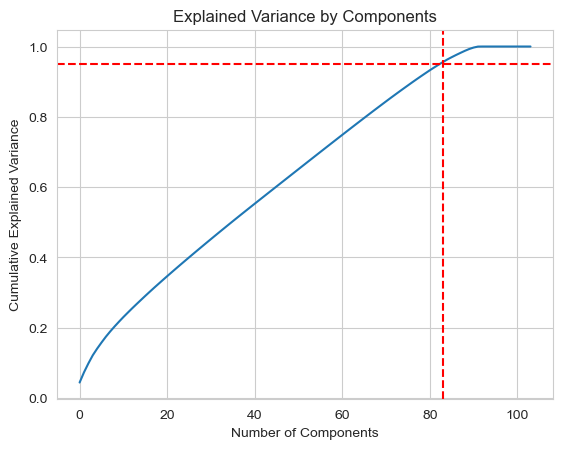

In [155]:
from sklearn.decomposition import PCA

pca = PCA().fit(features_standardized)  
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95), color='r', linestyle='--')
plt.show()


In [156]:
pca = PCA(n_components=80) 
features_pca = pca.fit_transform(features_standardized)

In [157]:
features_pca_df = pd.DataFrame(data=features_pca)

In [158]:
features_pca_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.506032,-2.440592,-0.602836,1.450888,0.099407,2.126820,0.206339,0.419427,-0.479178,1.361919,...,-0.233903,0.467765,0.890000,1.062437,-0.307561,-0.484023,1.507860,-0.383153,0.639476,0.895630
1,-3.079008,-1.621489,0.066952,0.117223,0.082517,0.722161,0.726623,0.954991,-0.850668,-1.887203,...,0.044072,-0.006311,-0.518698,0.111579,0.058239,-0.575367,0.030663,0.582771,0.365787,-0.911142
2,0.725731,0.908263,-1.195596,-0.715774,0.404277,1.046386,-2.508632,-0.092876,0.769269,1.169065,...,-0.253183,0.593116,0.139693,0.101070,0.689790,0.300840,0.716677,-0.286893,0.383014,-0.340958
3,-0.791180,2.594801,0.734155,-0.244298,-3.025774,-0.427254,-0.045583,-2.499069,-0.017982,-1.068035,...,-1.189130,0.753753,0.385753,-0.363966,-0.033776,-0.212878,0.521265,0.117635,-0.245016,1.350404
4,1.156426,-1.401806,4.599428,0.327009,0.887258,-2.897912,2.107910,-2.118942,-1.385962,-1.298849,...,-1.022996,1.378688,0.720652,-0.124945,0.885428,0.277571,-1.003973,1.047213,-1.536416,2.649070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.774162,-1.693273,0.077272,-0.507695,0.638791,-3.655443,1.822656,0.400193,-0.867256,0.907696,...,1.438389,0.456098,0.527182,-1.153392,0.760264,-1.160236,-1.426469,-0.871806,-0.783547,0.976696
32557,-1.772978,1.775795,-0.546356,-0.812784,-0.273356,-1.333232,-0.650443,-0.385633,0.761969,0.630838,...,-0.539907,-0.138299,0.189686,-0.980918,-0.598185,-0.168219,-0.083068,-0.039637,0.190326,-0.209810
32558,2.331586,-0.874808,0.413989,-4.040571,0.394119,-1.074699,-0.434405,0.908410,1.158163,0.154580,...,0.257844,-0.876007,-0.470015,0.051410,0.120324,-1.264256,-0.011553,-0.259267,1.045575,1.014279
32559,1.851414,1.280996,-1.841374,1.407788,-0.587111,-0.303465,0.601487,0.943981,0.475251,1.210647,...,0.024732,-0.137087,-0.011082,0.303221,-0.146152,0.217413,0.343154,-0.385921,0.416527,-0.026368


In [159]:
features_pca.shape

(32561, 80)

In [160]:
features_pca

array([[ 0.50603228, -2.44059164, -0.60283612, ..., -0.383153  ,
         0.63947579,  0.89563005],
       [-3.07900815, -1.62148894,  0.06695155, ...,  0.58277108,
         0.36578704, -0.91114212],
       [ 0.72573078,  0.90826323, -1.19559613, ..., -0.2868934 ,
         0.38301449, -0.3409579 ],
       ...,
       [ 2.33158644, -0.87480752,  0.41398941, ..., -0.25926685,
         1.04557452,  1.01427945],
       [ 1.85141416,  1.28099609, -1.84137405, ..., -0.3859208 ,
         0.41652703, -0.02636817],
       [-0.67514026, -1.77168091,  0.5705556 , ..., -1.24248388,
        -0.5731735 ,  0.75346309]])

In [167]:
target= data['income']
target

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 32561, dtype: object

In [169]:
target.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)
target

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [173]:
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

In [184]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True)
}

model_predictions = {}

for model_name, model in classifiers.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    model_predictions[model_name] = y_pred 
    
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Results for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("="*60)

Training Logistic Regression...
Results for Logistic Regression:
[[4579  363]
 [ 720  851]]
Precision: 0.70
Recall: 0.54
F1-Score: 0.61
Accuracy: 0.83
Training Decision Tree...
Results for Decision Tree:
[[4236  706]
 [ 764  807]]
Precision: 0.53
Recall: 0.51
F1-Score: 0.52
Accuracy: 0.77
Training Random Forest...
Results for Random Forest:
[[4451  491]
 [ 725  846]]
Precision: 0.63
Recall: 0.54
F1-Score: 0.58
Accuracy: 0.81
Training Gradient Boosting...
Results for Gradient Boosting:
[[4579  363]
 [ 704  867]]
Precision: 0.70
Recall: 0.55
F1-Score: 0.62
Accuracy: 0.84
Training Support Vector Machine...
Results for Support Vector Machine:
[[4620  322]
 [ 803  768]]
Precision: 0.70
Recall: 0.49
F1-Score: 0.58
Accuracy: 0.83


In [187]:
from sklearn.model_selection import cross_val_score
cv_results = {}

for model_name, model in classifiers.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, features_pca, target, cv=5)
    cv_results[model_name] = cv_scores
    print(f"{model_name} CV Mean Accuracy: {cv_scores.mean():.2f}")
    print("="*60)

Cross-validating Logistic Regression...
Logistic Regression CV Mean Accuracy: 0.83
Cross-validating Decision Tree...
Decision Tree CV Mean Accuracy: 0.78
Cross-validating Random Forest...
Random Forest CV Mean Accuracy: 0.81
Cross-validating Gradient Boosting...
Gradient Boosting CV Mean Accuracy: 0.84
Cross-validating Support Vector Machine...
Support Vector Machine CV Mean Accuracy: 0.83


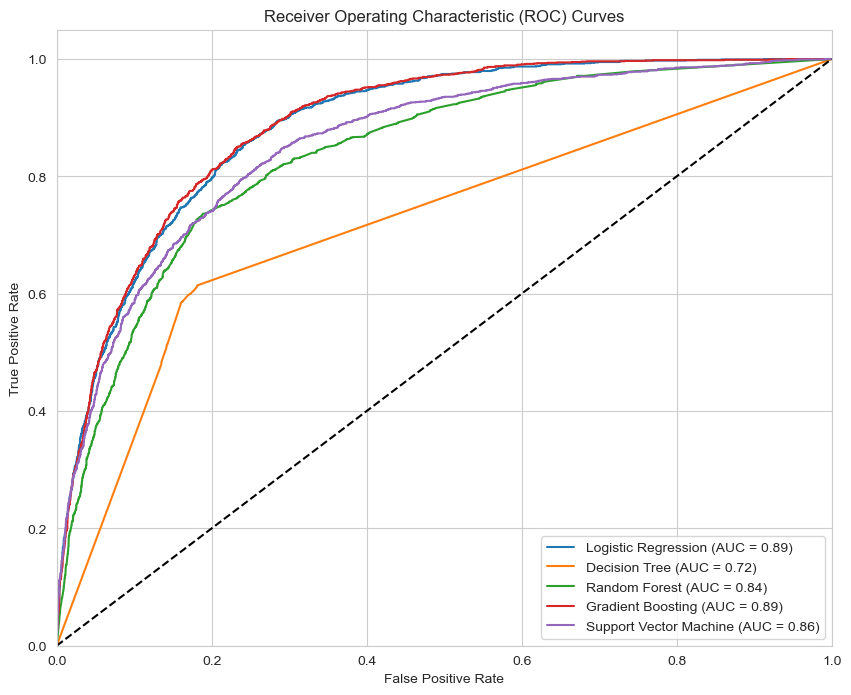

In [185]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for model_name, model in classifiers.items():
    if model_name == 'Support Vector Machine':
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'penalty': ['l1', 'l2', 'none'], 
    'max_iter': [100, 200, 500, 1000]  
}

logistic = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(features_pca, target)

print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest Score:")
print(grid_search.best_score_)

C:\Users\sneha.priya\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneha.priya\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneha.priya\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sneha.priya\AppData\Local\anaconda3\Li

Best Parameters found by GridSearchCV:
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Best Score:
0.8336662339656351
